pioni



In [ ]:
import numpy as np
import pandas as pd

mydata = pd.read_csv('netflix_titles.csv')
mydata.head(15)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
mydata.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Kesimpulan**
* Dataset relatif bersih, tetapi terdapat banyak missing values pada kolom director, serta cukup signifikan pada cast dan country. Kolom-kolom ini perlu mendapat perhatian khusus untuk penanganan data kosong.

# **Missing Value**

In [ ]:
cleanDF = mydata.copy()

cleanDF = cleanDF.dropna(subset=['director'])

cleanDF['cast']= cleanDF['cast'].fillna(cleanDF['cast'].mode()[0])

cleanDF['country']= cleanDF['country'].fillna(cleanDF['country'].mode()[0])

cleanDF['rating']= cleanDF['rating'].fillna(cleanDF['rating'].mode()[0])

cleanDF['date_added']= cleanDF['date_added'].fillna(cleanDF['date_added'].mode()[0])

cleanDF['duration']= cleanDF['duration'].fillna(cleanDF['duration'].mode()[0])

cleanDF.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**Kesimpulan**
* Semua kolom (show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description) memiliki nilai 0 missing values.
* Dataset sudah bersih dan tidak ada lagi data kosong yang perlu ditangani.

# **Tipe Data**

In [ ]:
cleanDF["date_added"] = pd.to_datetime(cleanDF["date_added"], errors="coerce")
cleanDF['date_added'].unique()

<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00',
 ...
 '2018-09-27 00:00:00', '2017-03-23 00:00:00', '2016-12-25 00:00:00',
 '2016-11-30 00:00:00', '2017-10-23 00:00:00', '2017-11-04 00:00:00',
 '2015-08-05 00:00:00', '2018-12-06 00:00:00', '2016-03-09 00:00:00',
 '2020-01-11 00:00:00']
Length: 1540, dtype: datetime64[ns]

In [ ]:
cleanDF["rating"] = cleanDF["rating"].astype("category")

In [ ]:
cleanDF["duration_num"] = cleanDF["duration"].str.extract(r"(\d+)").astype(float)
cleanDF["duration_type"] = cleanDF["duration"].str.extract(r"([a-zA-Z]+)")


In [ ]:
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6173 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        6173 non-null   object        
 1   type           6173 non-null   object        
 2   title          6173 non-null   object        
 3   director       6173 non-null   object        
 4   cast           6173 non-null   object        
 5   country        6173 non-null   object        
 6   date_added     6168 non-null   datetime64[ns]
 7   release_year   6173 non-null   int64         
 8   rating         6173 non-null   category      
 9   duration       6173 non-null   object        
 10  listed_in      6173 non-null   object        
 11  description    6173 non-null   object        
 12  duration_num   6173 non-null   float64       
 13  duration_type  6173 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(10)
memory us

# **Duplicate**

In [ ]:
cleanDF.duplicated().sum()

np.int64(0)

In [ ]:
duplicates = cleanDF[cleanDF.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, duration_num, duration_type]
Index: []


**Kesimpulan**
* Dataset bersih dari duplikasi sehingga bisa langsung digunakan tanpa perlu proses penghapusan data ganda.

# **Outlier**

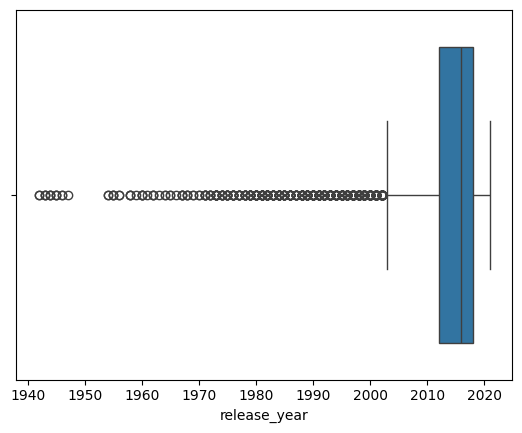

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=cleanDF["release_year"])
plt.show()


**Kesimpulan**
* Rentang data mayoritas berada di sekitar tahun 2000–2020.
* Terlihat ada outlier di sisi kiri (tahun 1940–1990-an).

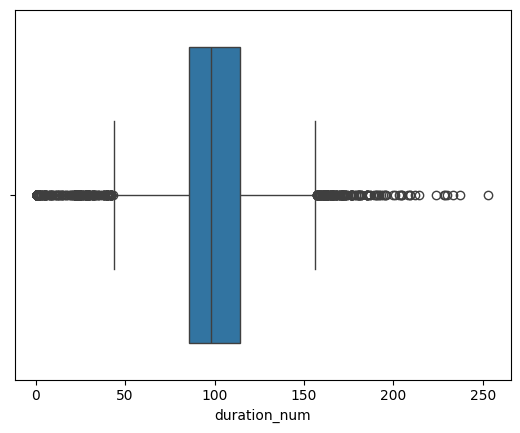

In [ ]:
sns.boxplot(x=cleanDF["duration_num"])
plt.show()


**Kesimpulan**
* Median ada di sekitar 100 menit.
* Mayoritas film berdurasi 80–120 menit, tapi ada variasi besar dari short film hingga documentary panjang.

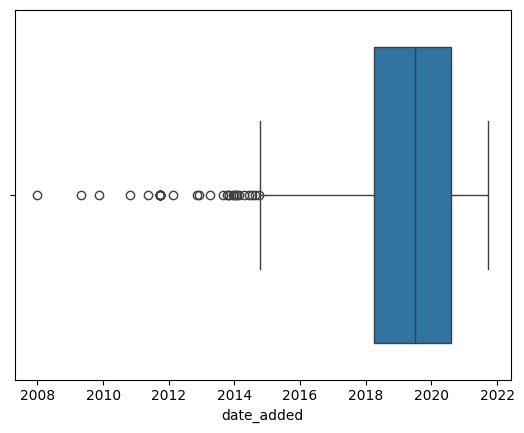

In [ ]:
sns.boxplot(x=cleanDF["date_added"])
plt.show()


**Kesimpulan**
* Mayoritas data ditambahkan ke Netflix pada periode 2017–2021.
* Netflix lebih banyak menambah konten baru dalam beberapa tahun terakhir.

**Kesimpulan**
* Data Cleaning

Missing Values: Awalnya terdapat banyak data kosong pada director, cast, dan country. Setelah dibersihkan, hanya tersisa 5 missing values pada date_added.

Tipe Data: Sudah rapi dan sesuai (object, datetime, int, float, category).

Duplicate: Tidak ditemukan data duplikat (0 duplicated rows).

* Analisis Outlier & Insight

Tahun Rilis (Release Year):
Rentang data mayoritas berada pada 2000–2020.
Terdapat outlier berupa film lama di 1940–1990-an.

Durasi Film (Duration): Median durasi film sekitar 100 menit. Mayoritas film berdurasi 80–120 menit, namun terdapat variasi besar mulai dari short film hingga documentary panjang.

Tanggal Penambahan (Date Added): Mayoritas data ditambahkan ke Netflix pada periode 2017–2021. Menunjukkan bahwa Netflix lebih aktif menambah konten baru dalam beberapa tahun terakhir.

# *CSV FILE**

In [ ]:
cleanDF.to_csv("clean_dataset.csv", index=False)

print("Dataset berhasil disimpan sebagai clean_dataset.csv")

Dataset berhasil disimpan sebagai clean_dataset.csv


Dataset telah berhasil disimpan dalam file clean_dataset.csv. File ini merupakan hasil dari proses pembersihan data. Dengan demikian, clean_dataset.csv merupakan dataset yang sudah bersih dan siap digunakan untuk tahap analisis lebih lanjut